In [1]:
import gzip
import json
import os
import pickle

import numpy as np
import seaborn as sns
from d3graph import d3graph, vec2adjmat
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

from machine_learning.mapper.create_complex import create_complex

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (8, 8)

### dataset

In [3]:
# get mnist.pkl.gz from online, it is not included in this package to save 17.1MB space
data_dirpath = "../data"
filename = "mnist.pkl.gz"
filepath = os.path.join(data_dirpath, filename)
with gzip.open(filepath, "rb") as f:
    _, _, test_data = pickle.load(f, encoding="latin1")

In [4]:
X, _ = test_data

### applying Mapper

In [5]:
random_state = 0
tsne = TSNE(init='pca', random_state=random_state)

In [6]:
Y = tsne.fit_transform(X)

/Users/dnguyen/Dinh/machine_learning/env/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/dnguyen/Dinh/machine_learning/env/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


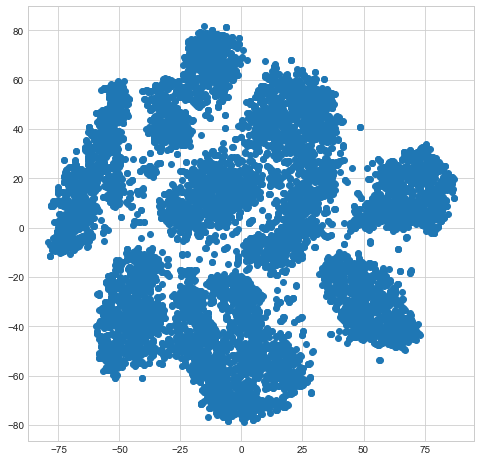

In [7]:
plt.figure(figsize=figsize)
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

In [8]:
n_intervals = 10

overlap_ratio = 0.2

eps = 20
min_samples = 20
cluster_class = DBSCAN
cluster_params = {"eps": eps, "min_samples": min_samples}

In [9]:
complex_ = create_complex(X, Y, n_intervals, overlap_ratio, cluster_class, cluster_params)

### saving complex

In [10]:
filepath = "digits.json"
with open(filepath, 'w') as f:
    json.dump(complex_, f)

### rendering complex
if R is installed then use machine_learning.mapper.render_complex.R instead of below

In [11]:
d3 = d3graph()

In [12]:
edge_sources = complex_.edge_sources
edge_targets = complex_.edge_targets
edge_values = complex_.edge_values

matrix = vec2adjmat(edge_sources, edge_targets, weight=edge_values)

In [13]:
vertex_sizes = complex_.vertex_sizes

d3.graph(matrix)
d3.set_node_properties(color=matrix.columns.values, size=np.array(vertex_sizes) / 100)  # scale size down a bit
d3.show(filepath="./digits.html")  # default showfig=True seems ineffective in jupyter notebook, open html file instead

[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Slider range is set to [0, 72]
[d3graph] INFO> Write to path: [/Users/dnguyen/Dinh/machine_learning/notebooks/mapper/digits.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/dnguyen/Dinh/machine_learning/notebooks/mapper/digits.html]
